<a href="https://colab.research.google.com/github/jjhwan-h/ML/blob/main/AUC_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

In [4]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
pred_prob1 = model1.predict_proba(X_test)

In [6]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1],pos_label=1)

In [7]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [8]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print('AUC value : %s'%auc_score1)

AUC value : 0.9762374461979914


<ipython-input-9-91efa23f6779>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


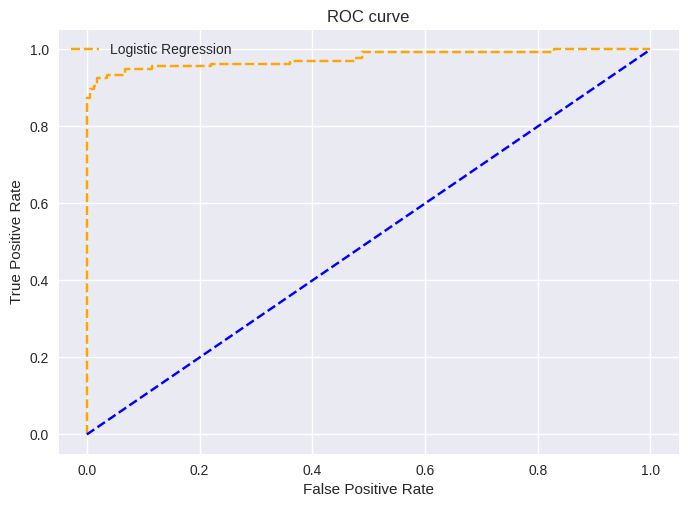

In [9]:
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange',label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()